# Hopfield Networks 1

Use Hopfield networks to correct distorted binary patterns.

In [1]:
import sys

import matplotlib.pyplot as plt
import numpy as np; np.random.seed(0)

from ann.hopfield_network import HopfieldNetwork, TRAINING_PATTERNS, DISTORTED_PATTERNS
from ann.plotting import figsize, subplots

# Train Network

In [2]:
model = HopfieldNetwork()

model.train(TRAINING_PATTERNS);

# Recall Distorted Patterns

In [3]:
def test_recall(model, distorted, expected, synchronous=False, silent=False):
    recalled = model.recall(distorted, synchronous=synchronous)
    result = np.array_equal(recalled, expected)

    if not silent:
        msg = 'Success' if result else 'Failure'
        print("{} => {} ({})".format(distorted, recalled, msg))
        
    return result

In [4]:
for expected, distorted in zip(TRAINING_PATTERNS, DISTORTED_PATTERNS):
    test_recall(model, distorted, expected, synchronous=False)

[ 1 -1  1 -1  1 -1 -1  1] => [-1 -1  1 -1  1 -1 -1  1] (Success)
[ 1  1 -1 -1 -1  1 -1 -1] => [-1  1 -1 -1 -1  1 -1 -1] (Failure)
[ 1  1  1 -1  1  1 -1  1] => [-1  1  1 -1 -1  1 -1  1] (Success)


In [5]:
for expected, distorted in zip(TRAINING_PATTERNS, DISTORTED_PATTERNS):
    test_recall(model, distorted, expected, synchronous=True)

[ 1 -1  1 -1  1 -1 -1  1] => [-1. -1.  1. -1.  1. -1. -1.  1.] (Success)
[ 1  1 -1 -1 -1  1 -1 -1] => [-1.  1. -1. -1. -1.  1. -1. -1.] (Failure)
[ 1  1  1 -1  1  1 -1  1] => [-1.  1.  1. -1. -1.  1. -1.  1.] (Success)


# Find Attractors

In [6]:
attractors = model.attractors()

print("Found {} attractors:".format(len(attractors)))

for attr in attractors:
      print(np.array(attr))

Found 14 attractors:
[ 1  1 -1  1  1 -1  1 -1]
[ 1  1 -1  1  1  1  1 -1]
[ 1  1 -1  1 -1  1  1 -1]
[-1 -1  1 -1  1  1 -1  1]
[-1  1  1 -1 -1  1 -1  1]
[-1 -1 -1 -1 -1  1 -1 -1]
[ 1  1  1  1  1 -1  1  1]
[-1  1 -1 -1 -1  1 -1 -1]
[-1 -1 -1 -1  1 -1 -1 -1]
[-1 -1  1 -1 -1  1 -1  1]
[ 1  1  1  1 -1  1  1  1]
[-1  1  1 -1  1 -1 -1  1]
[-1 -1  1 -1  1 -1 -1  1]
[ 1 -1 -1  1  1 -1  1 -1]


# Recall Strongly Distorted Patterns

In [7]:
def test_noisy_recall(model, patterns, synchronous=False, runs=10):
    pattern_size = patterns.shape[1]
    ind = np.arange(pattern_size)

    bitflips = range(len(patterns[0]))
    res = [[] for _ in patterns]

    for num_distorted in bitflips:
        sys.stdout.write("{}".format(num_distorted).ljust(80) + "\r")
        sys.stdout.flush()

        for i, pattern in enumerate(patterns):
            res_ = []

            for _ in range(runs):
                correct = 0

                for _ in range(100):
                    distorted = pattern.copy()

                    ind_random = np.random.choice(
                        ind, num_distorted, replace=False)

                    distorted[ind_random] *= -1

                    correct += test_recall(model,
                                           distorted,
                                           pattern,
                                           synchronous=synchronous,
                                           silent=True)

                res_.append(correct)

            res[i].append(res_)

    _, ax = subplots(1, 1, size=figsize(1, 1.5))

    for i, res_ in enumerate(res):
        mean = [np.mean(r) for r in res_]
        std = [np.std(r) for r in res_]

        ax.errorbar(bitflips, mean, yerr=std, label=patterns[i])

    upd_type = "Synchronous" if synchronous else "Asynchronous"
    fmt = upd_type + " Updates (Statistics from {} Runs)"

    ax.set_title(fmt.format(runs))

    ax.set_xlabel("Bitflips")
    ax.set_ylabel("Correctly Recalled Patterns (Percent)")

    ax.legend()
    ax.grid()

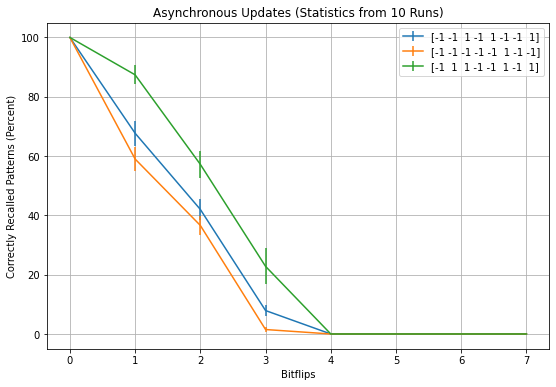

In [8]:
test_noisy_recall(model, TRAINING_PATTERNS, synchronous=False)

plt.savefig('../figures/strongly_distorted_recall_async.svg')

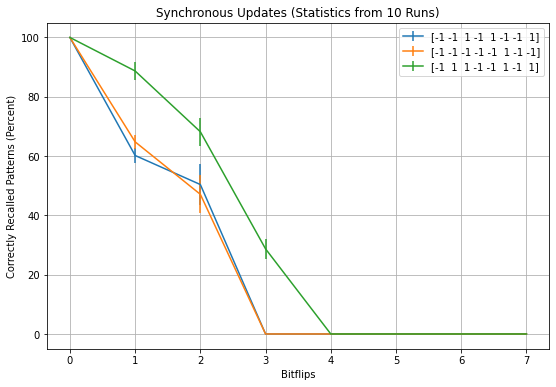

In [9]:
test_noisy_recall(model, TRAINING_PATTERNS, synchronous=True)

plt.savefig('../figures/strongly_distorted_recall_sync.svg')